
#HOMEWORK
Design a simulation where you toss two coins simultaneously.

Record the possible outcomes (heads or tails for each coin) and run the simulation for multiple trials (e.g., 100, 500, or 1000 tosses).

After collecting the data:

- Calculate the probabilities of each outcome (HH, HT, TH, TT).

- Visualize the results using a bar chart or pie chart to represent the frequencies and probabilities of each outcome.

- Analyze whether the results align with the expected theoretical probabilities.

In [1]:
import numpy as np

coin1 = ['Heads', 'Tails']
coin2 = ['Heads', 'Tails']

throws = [100, 500, 5000]
practical_prob = {}
theoretical_prob = 0.25

for number_of_throws in throws:

  tosses_coin1 = np.random.choice(coin1, number_of_throws)
  tosses_coin2 = np.random.choice(coin2, number_of_throws)

  HH = np.sum((tosses_coin1 == 'Heads') & (tosses_coin2 == 'Heads'))
  HT = np.sum((tosses_coin1 == 'Heads') & (tosses_coin2 == 'Tails'))
  TH = np.sum((tosses_coin1 == 'Tails') & (tosses_coin2 == 'Heads'))
  TT = np.sum((tosses_coin1 == 'Tails') & (tosses_coin2 == 'Tails'))

  prob_HH = HH / number_of_throws
  prob_HT = HT / number_of_throws
  prob_TH = TH / number_of_throws
  prob_TT = TT / number_of_throws

  practical_prob[number_of_throws] = [prob_HH, prob_HT, prob_TH, prob_TT]

  print(f'Probabilities for {number_of_throws} throws: HH {prob_HH:.2f}, HT {prob_HT:.2f}, TH {prob_TH:.2f}, TT {prob_TT:.2f}' )


for number_of_throws in throws:
    total_diff = sum(abs(prob - theoretical_prob) for prob in practical_prob[number_of_throws])
    print(f'Total difference for {number_of_throws} throws: {total_diff:.4f}')

print('The result of the analysis: if number of throws increases, the total difference tends to decrease, which is consistent with the Law of Large Numbers.')

Probabilities for 100 throws: HH 0.21, HT 0.18, TH 0.34, TT 0.27
Probabilities for 500 throws: HH 0.23, HT 0.24, TH 0.26, TT 0.27
Probabilities for 5000 throws: HH 0.25, HT 0.24, TH 0.25, TT 0.25
Total difference for 100 throws: 0.2200
Total difference for 500 throws: 0.0640
Total difference for 5000 throws: 0.0192
The result of the analysis: if number of throws increases, the total difference tends to decrease, which is consistent with the Law of Large Numbers.


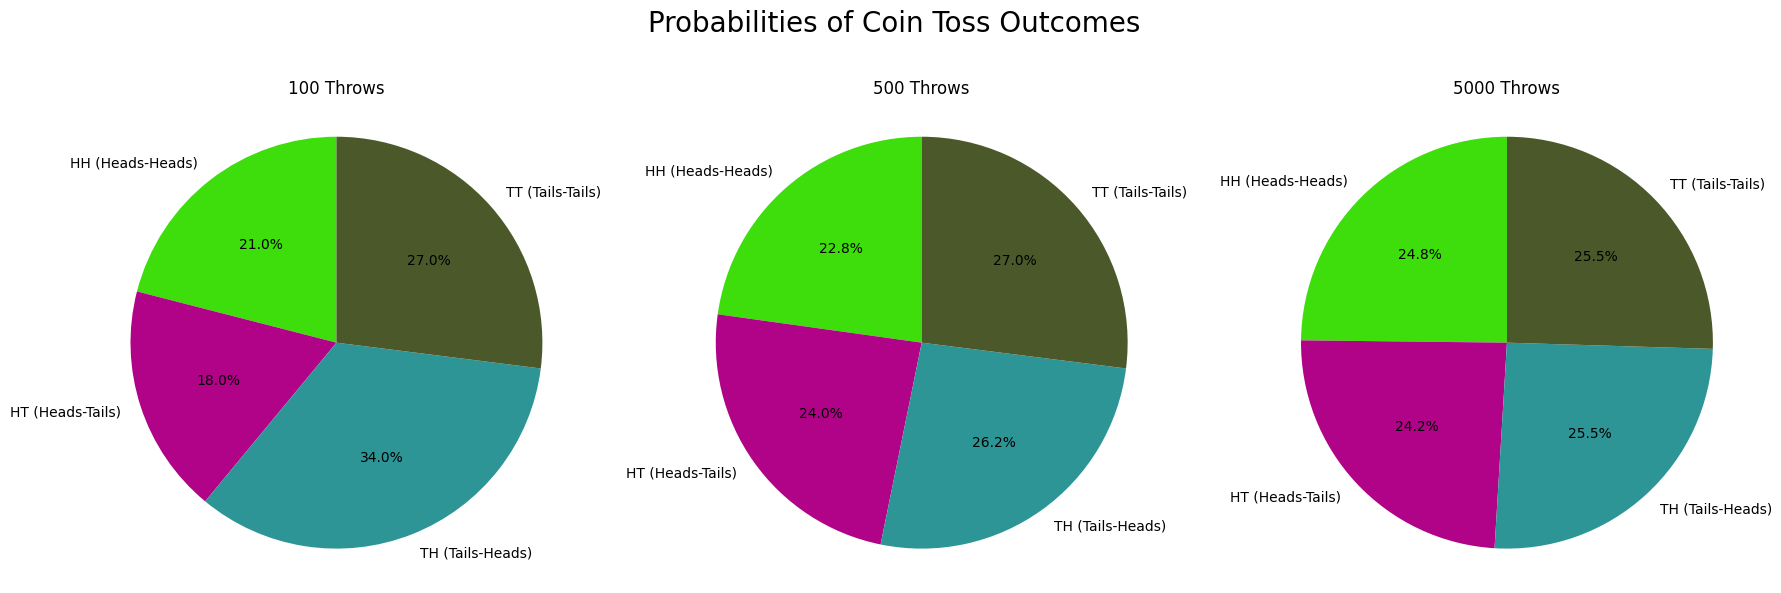

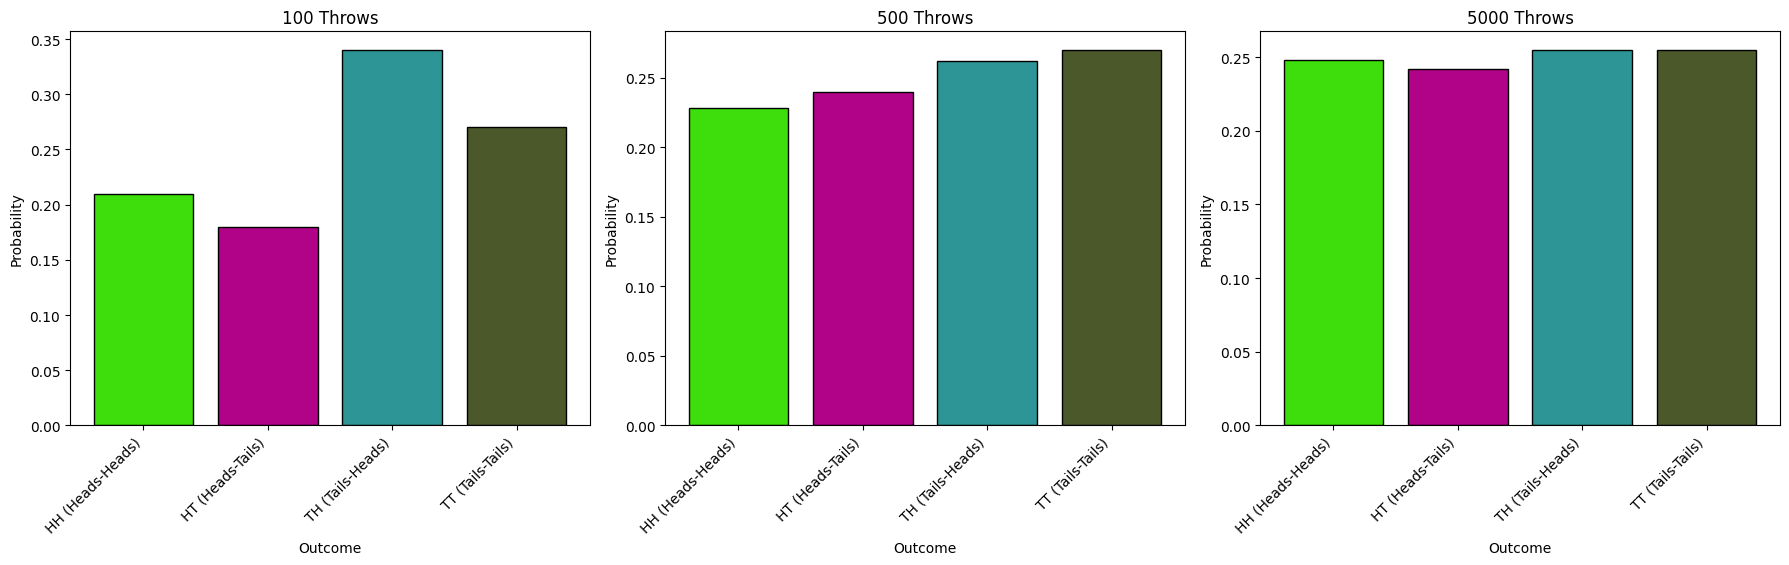

In [5]:
import matplotlib.pyplot as plt

labels = ['HH (Heads-Heads)', 'HT (Heads-Tails)', 'TH (Tails-Heads)', 'TT (Tails-Tails)']

num_colors = len(labels)
colors = np.random.rand(num_colors, 3)


fig, axes = plt.subplots(1, len(throws), figsize=(18, 6))

for i, number_of_throws in enumerate(throws):
    ax = axes[i]
    proportions = practical_prob[number_of_throws]
    ax.pie(proportions, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
    ax.axis('equal')
    ax.set_title(f'{number_of_throws} Throws')

plt.suptitle('Probabilities of Coin Toss Outcomes', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


fig, axes = plt.subplots(1, len(throws), figsize=(18, 6))

for i, number_of_throws in enumerate(throws):
    ax = axes[i]
    height = practical_prob[number_of_throws]
    x_pos = np.arange(len(labels))
    ax.bar(x_pos, height, color=colors, edgecolor='black')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.set_title(f'{number_of_throws} Throws')
    ax.set_xlabel('Outcome')
    ax.set_ylabel('Probability')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()